In [21]:
import numpy as np
import matplotlib.pyplot as plt
from random import random, uniform

# a)

In [22]:
def GasIdealClasico2D(T, v0, delta, steps):
    beta = 1.0 / T
    k0 = 0.5 * np.dot(v0, v0)
    energia = [k0]
    velocidad = [v0]

    for mcs in range(steps):
        delta_v_magnitud = uniform(0, delta)
        phi = uniform(0, 2 * np.pi)
        delta_v = delta_v_magnitud * np.array([np.cos(phi), np.sin(phi)])
        
        vprueba = v0 + delta_v
        kprueba = 0.5 * np.dot(vprueba, vprueba)
        dk = kprueba - k0
        
        if dk < 0 or random() < np.exp(-beta * dk):
            v0 = vprueba
            k0 = kprueba
        
        energia.append(k0)
        velocidad.append(v0)
    
    return np.array(energia), np.array(velocidad)

In [ ]:
T = 10 
v0 = np.array([10, 10]) 
delta = 10  
steps = 1000000
energia, velocidad = GasIdealClasico2D(T, v0, delta, steps)

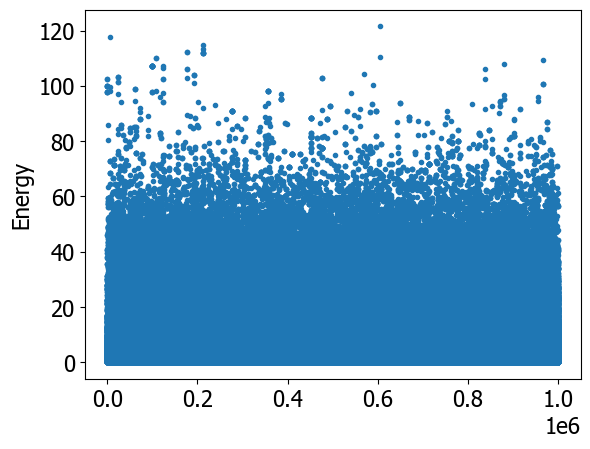

<E> = 9.989, kBT = 10.00, error = 0.11%


In [28]:
plt.rc('text', usetex=False)

plt.plot(energia, '.')
plt.ylabel("Energy")
plt.show()

Eprom = np.mean(energia[1000:])
print('<E> = {0:.3f}, kBT = {1:.2f}, error = {2:.2f}%'.format(Eprom, T, np.abs(Eprom - T) / T * 100))

# b)

In [30]:
def plot_distribucion_v(velocidades, T):
    beta = 1 / T
    otrocolor = [(0.2, 0.4, 0.6, 0.2)] 
    velocidadesTot = velocidades.flatten()
    
    plt.figure(figsize=(8, 6))
    
    n, bins, patches = plt.hist(velocidadesTot, bins=100, color=otrocolor, density=True)
    
    x = np.linspace(-15, 15, 100)
    Pb = np.sqrt(beta / (2 * np.pi)) * np.exp(-beta * x**2 / 2)
    
    plt.plot(x, Pb, 'k-')
    plt.ylabel('P(v)', fontsize=18)
    plt.xlabel('v', fontsize=18)   
    plt.text(2.5, 0.12, 'P_B(v) = (beta m/2pi)^(1/2) * exp(-beta m v^2 / 2)')
    plt.show()

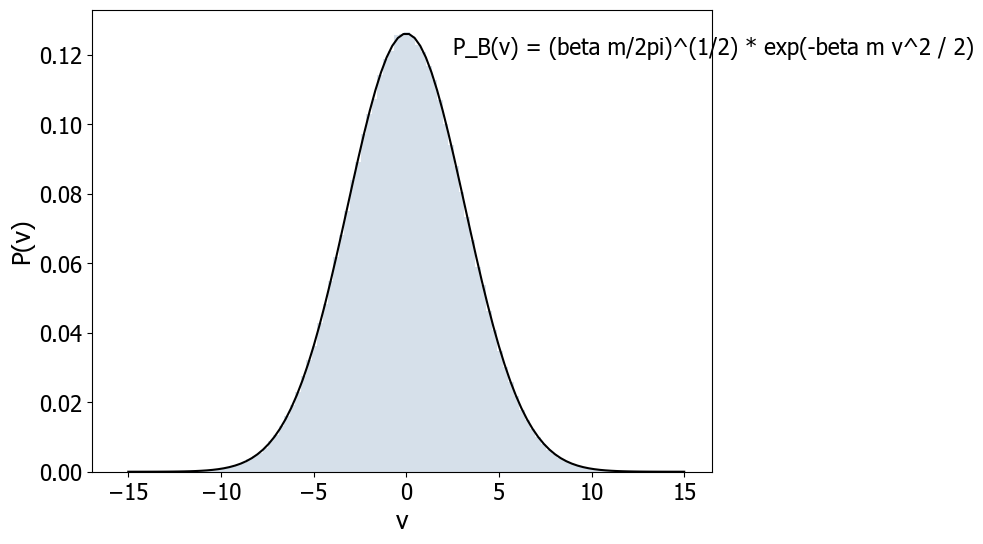

In [31]:
plot_distribucion_v(velocidad, T)

# c)

Al variar el valor máximo del cambio de velocidad (`Δv_max`):

- **Pequeño `Δv_max`**: 
  - Exploración lenta del espacio de velocidades.
  - Resultados potencialmente menos precisos.
  - Más pasos para alcanzar el equilibrio.

- **Grande `Δv_max`**: 
  - Alta tasa de rechazo de nuevos estados propuestos.
  - Simulación potencialmente ineficiente.
  - Precisión de los resultados puede ser afectada negativamente.